# This file is used to plot the training and validation accuracies for EfficientNetB0 and its modifications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def retrieve_acc(filename):
    train_acc = []
    val_acc = []
    
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("train Loss"):
                train_acc.append(float(line.split(":")[-1]))
                # print(line)
            if line.startswith("val Loss"):
                val_acc.append(float(line.split(":")[-1]))
            # print(line)

    return train_acc, val_acc

In [3]:
filename = 'Training and Validation epoch data/EfficientNetB0_frozen.txt'
frozen_train_acc, frozen_val_acc = retrieve_acc(filename)

print(len(frozen_train_acc))
print(len(frozen_val_acc))

25
25


In [4]:
filename = 'Training and Validation epoch data/EfficientNetB0_unfrozen.txt'
unfrozen_train_acc, unfrozen_val_acc = retrieve_acc(filename)

print(len(unfrozen_train_acc))
print(len(unfrozen_val_acc))

25
25


In [6]:
filename = 'Training and Validation epoch data/EfficientNetB0_ECA.txt'
eca_train_acc, eca_val_acc = retrieve_acc(filename)

print(len(eca_train_acc))
print(len(eca_val_acc))

25
25


In [7]:
print(f"Frozen: {max(frozen_val_acc)}")
print(f"Unfrozen: {max(unfrozen_val_acc)}")
print(f"ECA: {max(eca_val_acc)}")

Frozen: 0.8667
Unfrozen: 0.9108
ECA: 0.8853


## This cell below is to plot the training and validation accuracies. 
On the left, it is the training accuracies for different models. 
On the right, it is the validation accuracies for different models. 

We have 3 plots, in the following order:
- The original EfficientNetB0 model accuracy that has frozen parameters. (Blue colour)
- The original EfficientNetB0 model accuracy that has unfrozen parameters. (Green colour)
- The modified EfficientNetB0 model with ECA. (Red colour)

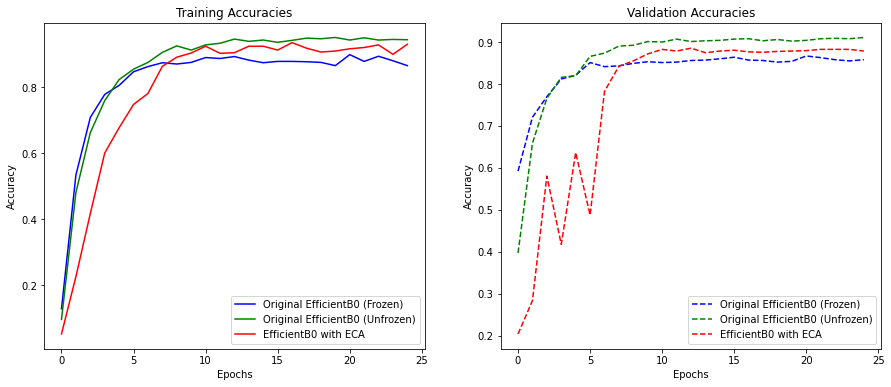

In [9]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
epochs = range(25)
# Plot training accuracies
ax1.plot(epochs, frozen_train_acc, 'b', label='Original EfficientB0 (Frozen)')
ax1.plot(epochs, unfrozen_train_acc, 'g', label='Original EfficientB0 (Unfrozen)')
ax1.plot(epochs, eca_train_acc, 'r', label='EfficientB0 with ECA')
ax1.set_title('Training Accuracies')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot validation accuracies
ax2.plot(epochs, frozen_val_acc, 'b--', label='Original EfficientB0 (Frozen)')
ax2.plot(epochs, unfrozen_val_acc, 'g--', label='Original EfficientB0 (Unfrozen)')
ax2.plot(epochs, eca_val_acc, 'r--', label='EfficientB0 with ECA')
ax2.set_title('Validation Accuracies')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()